<a href="https://colab.research.google.com/github/ryanditata/dataMining/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================================================
# 📘 PROJECT: Breast Cancer Classification
# Author: Ryandita Tegar Kusuma
# ============================================================

# 📦 1. Import Library Utama
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# ============================================================
# 📊 2. Load Dataset
# ============================================================
df = pd.read_csv("data.csv")

# Hapus kolom yang tidak relevan
df.drop(columns=["id", "Unnamed: 32"], inplace=True, errors="ignore")

# Lihat informasi awal
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (569, 31)
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...     

/tmp/ipython-input-933718962.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diagnosis", data=df, palette="pastel")


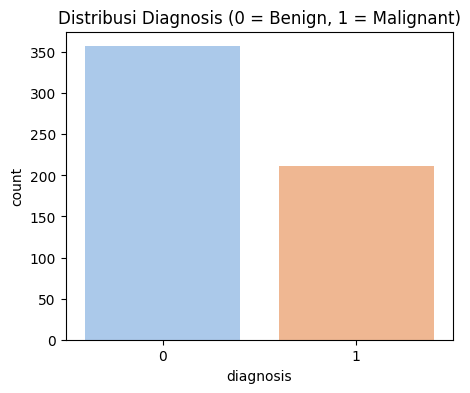

In [ ]:
# ============================================================
# 🧩 3. Data Understanding
# ============================================================

# Encode kolom diagnosis: M -> 1, B -> 0
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Cek distribusi target
plt.figure(figsize=(5, 4))
sns.countplot(x="diagnosis", data=df, palette="pastel")
plt.title("Distribusi Diagnosis (0 = Benign, 1 = Malignant)")
plt.show()

In [ ]:
# ============================================================
# 🧼 4. Data Preprocessing
# ============================================================

# Pisahkan fitur dan label
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Normalisasi fitur (standarisasi)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (455, 30)
Testing set: (114, 30)


In [ ]:
# ============================================================
# 🤖 5. Model Training - 3 Klasifikasi Berbeda
# ============================================================

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n📈 Model: {name}")
    print(f"Akurasi: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


📈 Model: Logistic Regression
Akurasi: 0.9649
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


📈 Model: Random Forest
Akurasi: 0.9649
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114


📈 Model: Gradient Boosting
Akurasi: 0.9649
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90     

/tmp/ipython-input-1602738741.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


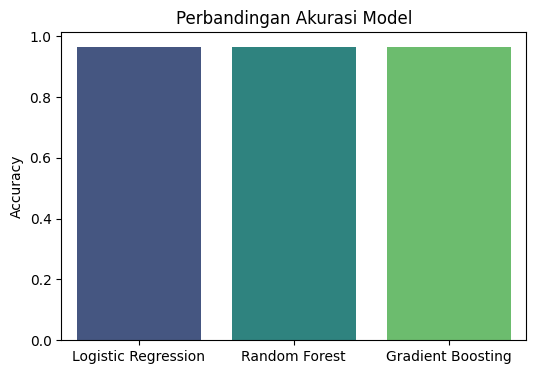

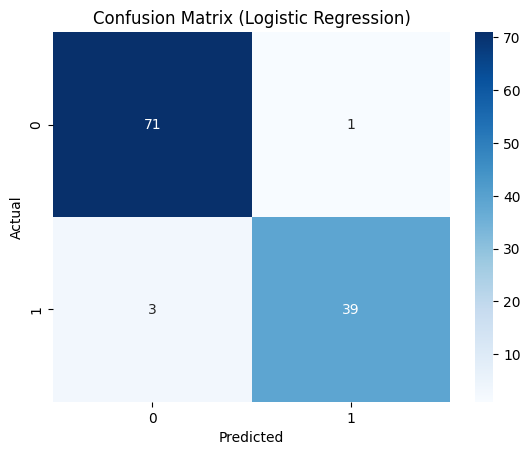


🏆 Model terbaik: Logistic Regression dengan akurasi 0.9649


In [ ]:
# ============================================================
# 📊 6. Evaluasi Model
# ============================================================

# Bandingkan akurasi ketiga model
plt.figure(figsize=(6, 4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Accuracy")
plt.show()

# Confusion matrix model terbaik
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix ({best_model_name})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"\n🏆 Model terbaik: {best_model_name} dengan akurasi {results[best_model_name]:.4f}")

In [ ]:
# ============================================================
# 💡 7. Insight dan Fitur Penting
# ============================================================

if best_model_name == "Random Forest":
    feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_importances.nlargest(10).plot(kind='barh', color='teal')
    plt.title("10 Fitur Paling Berpengaruh (Random Forest)")
    plt.show()

elif best_model_name == "Gradient Boosting":
    feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_importances.nlargest(10).plot(kind='barh', color='orange')
    plt.title("10 Fitur Paling Berpengaruh (Gradient Boosting)")
    plt.show()

# ============================================================
# 🧾 8. Kesimpulan dan Saran
# ============================================================
- Model terbaik: Logistic Regression
- Akurasi model terbaik: 0.9649
- Fitur penting terutama berhubungan dengan ukuran dan tekstur inti sel.
- Saran selanjutnya:
  Gunakan teknik feature selection untuk mengurangi kompleksitas model. Tambahkan interpretabilitas menggunakan SHAP atau LIME. Uji dengan dataset eksternal untuk validasi performa model.